In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ASY,130,283,0,ST,98,Y,2.0,Flat,1
3,48,F,NAP,138,214,0,ST,108,Y,1.5,Flat,1
4,54,M,ATA,150,195,0,Normal,122,N,0.6,Up,0


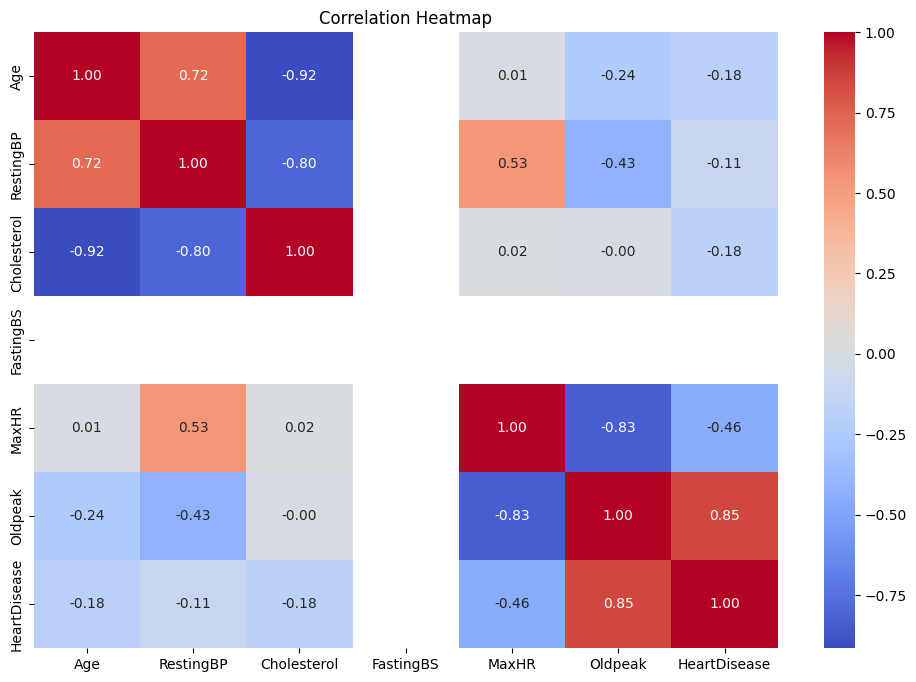

In [4]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [6]:
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [7]:
def preprocess_data(df):
    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=[
        'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'
    ], drop_first=True)

    X = df_encoded.drop("HeartDisease", axis=1)
    y = df_encoded["HeartDisease"]
    return X, y


In [9]:
X, y = preprocess_data(df)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

joblib.dump(clf, "model.pkl")
print("✅ Model trained and saved as model.pkl")


✅ Model trained and saved as model.pkl


In [11]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\saksh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\saksh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\saksh\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

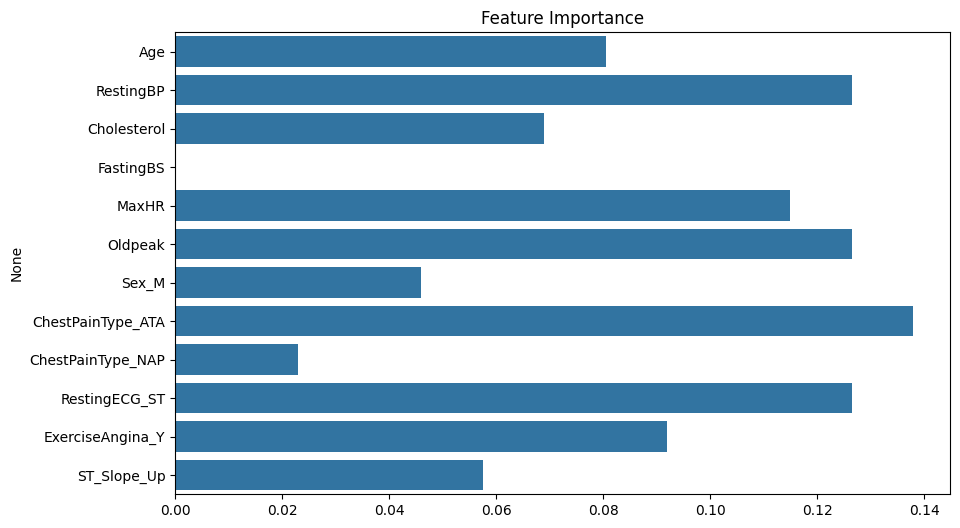

In [12]:
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


In [14]:
# Feature names based on dataset
features = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'thal'
]

# Create input widgets
widgets_dict = {
    feature: widgets.FloatText(description=feature, value=0.0) for feature in features
}
predict_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_predict_clicked(b):
    with output:
        clear_output()
        values = [widgets_dict[f].value for f in features]
        model = joblib.load("model.pkl")
        prediction = model.predict([values])
        result = "has heart disease" if prediction[0] == 1 else "does NOT have heart disease"
        print(f"🔍 Prediction: The person {result}.")

predict_button.on_click(on_predict_clicked)

# Display form
display(*(widgets_dict[feature] for feature in features))
display(predict_button, output)


FloatText(value=0.0, description='age')

FloatText(value=0.0, description='sex')

FloatText(value=0.0, description='cp')

FloatText(value=0.0, description='trestbps')

FloatText(value=0.0, description='chol')

FloatText(value=0.0, description='fbs')

FloatText(value=0.0, description='restecg')

FloatText(value=0.0, description='thalach')

FloatText(value=0.0, description='exang')

FloatText(value=0.0, description='oldpeak')

FloatText(value=0.0, description='slope')

FloatText(value=0.0, description='thal')

Button(description='Predict', style=ButtonStyle())

Output()